# In-class exercise Week 04

In this exercise, we will look at teaching evaluation data from the University of Texas, Austin.

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
evals = pd.read_csv("evals.csv")
print(evals.shape)
evals.head()

(463, 21)


score          rank     ethnicity  gender language  age  cls_perc_eval  \
0    4.7  tenure track      minority  female  english   36       55.81395   
1    4.1  tenure track      minority  female  english   36       68.80000   
2    3.9  tenure track      minority  female  english   36       60.80000   
3    4.8  tenure track      minority  female  english   36       62.60163   
4    4.6       tenured  not minority    male  english   59       85.00000   

   cls_did_eval  cls_students cls_level  ...   cls_credits bty_f1lower  \
0            24            43     upper  ...  multi credit           5   
1            86           125     upper  ...  multi credit           5   
2            76           125     upper  ...  multi credit           5   
3            77           123     upper  ...  multi credit           5   
4            17            20     upper  ...  multi credit           4   

   bty_f1upper  bty_f2upper  bty_m1lower  bty_m1upper  bty_m2upper  bty_avg  \
0            7            6            2            4            6      5.0   
1            7            6            2            4            6      5.0   
2            7            6            2            4            6      5.0   
3            7            6            2            4            6      5.0   
4            4            2            2            3            3      3.0   

   pic_outfit pic_color  
0  not formal     color  
1  not formal     color  
2  not formal     color  
3  not formal     color  
4  not formal     color  

[5 rows x 21 columns]

## Some practice of techniques from last week

- value counts of gender and ethnicity columns
- crosstab of gender+rank and ethnicity

NEW

- use of `.gender` instead of `['gender']` to access columns
- multi-index in creating the crosstab
- multi-indices for data frames generally

In [3]:
pd.value_counts(evals.gender)

male      268
female    195
Name: gender, dtype: int64

In [4]:
pd.value_counts(evals.ethnicity)

not minority    399
minority         64
Name: ethnicity, dtype: int64

In [5]:
demo_tbl = pd.crosstab([evals['gender'], evals['rank']], evals.ethnicity)
demo_tbl

ethnicity            minority  not minority
gender rank                                
female teaching             0            50
       tenure track        25            44
       tenured             11            65
male   teaching            10            42
       tenure track         3            36
       tenured             15           162

### If a faculty member is in the minority category, what is the probability that they are tenured.


P(tenured | minority)

Should be around 40%

NEW

- Use of `loc` to access multi-indexed data frames

In [6]:
(demo_tbl.loc['male', 'tenured']['minority'] + demo_tbl.loc['female', 'tenured']['minority']) / (demo_tbl['minority'].sum())

0.40625

### If a faculty member is in the non-minority category, what is the probability that they are tenured
P(tenured | non-minority)

In [7]:
(demo_tbl.loc['male', 'tenured']['not minority'] + demo_tbl.loc['female', 'tenured']['not minority']) / (demo_tbl['not minority'].sum())

0.568922305764411

## Compare distributions male/not-minority vs female/minoriity

Steps:
- First create two data frames, one for each group
- Create a histogram of the score variable for each group
- Create a side-by-side boxplot

IC NOTE: Show the error that results if you don't use () around the clauses in the binary indexer.

NEW

- Complex Boolean expressions to extract data
- str.contains() to do string search comparisons

In [8]:
male_non = evals[(evals.gender=='male') &  (evals.ethnicity.str.contains('not'))]
print (male_non.shape)
male_non.head()

(240, 21)


score     rank     ethnicity gender language  age  cls_perc_eval  \
4    4.6  tenured  not minority   male  english   59       85.00000   
5    4.3  tenured  not minority   male  english   59       87.50000   
6    2.8  tenured  not minority   male  english   59       88.63636   
7    4.1  tenured  not minority   male  english   51      100.00000   
8    3.4  tenured  not minority   male  english   51       56.92308   

   cls_did_eval  cls_students cls_level  ...   cls_credits bty_f1lower  \
4            17            20     upper  ...  multi credit           4   
5            35            40     upper  ...  multi credit           4   
6            39            44     upper  ...  multi credit           4   
7            55            55     upper  ...  multi credit           5   
8           111           195     upper  ...  multi credit           5   

   bty_f1upper  bty_f2upper  bty_m1lower  bty_m1upper  bty_m2upper  bty_avg  \
4            4            2            2            3            3    3.000   
5            4            2            2            3            3    3.000   
6            4            2            2            3            3    3.000   
7            2            5            2            3            3    3.333   
8            2            5            2            3            3    3.333   

   pic_outfit pic_color  
4  not formal     color  
5  not formal     color  
6  not formal     color  
7  not formal     color  
8  not formal     color  

[5 rows x 21 columns]

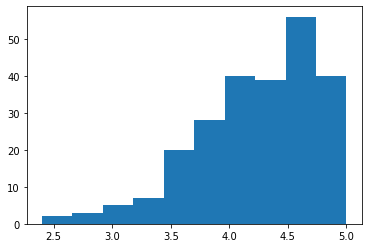

In [9]:
ans = plt.hist(male_non.score)

In [10]:
female_min = evals[(evals.gender=='female') &  (evals.ethnicity=='minority')]
print (female_min.shape)
female_min.head()

(36, 21)


score          rank ethnicity  gender     language  age  cls_perc_eval  \
0      4.7  tenure track  minority  female      english   36       55.81395   
1      4.1  tenure track  minority  female      english   36       68.80000   
2      3.9  tenure track  minority  female      english   36       60.80000   
3      4.8  tenure track  minority  female      english   36       62.60163   
126    3.4  tenure track  minority  female  non-english   29       73.07692   

     cls_did_eval  cls_students cls_level  ...   cls_credits bty_f1lower  \
0              24            43     upper  ...  multi credit           5   
1              86           125     upper  ...  multi credit           5   
2              76           125     upper  ...  multi credit           5   
3              77           123     upper  ...  multi credit           5   
126            19            26     upper  ...  multi credit           3   

     bty_f1upper  bty_f2upper  bty_m1lower  bty_m1upper  bty_m2upper  bty_avg  \
0              7            6            2            4            6    5.000   
1              7            6            2            4            6    5.000   
2              7            6            2            4            6    5.000   
3              7            6            2            4            6    5.000   
126            3            4            2            3            2    2.833   

     pic_outfit pic_color  
0    not formal     color  
1    not formal     color  
2    not formal     color  
3    not formal     color  
126  not formal     color  

[5 rows x 21 columns]

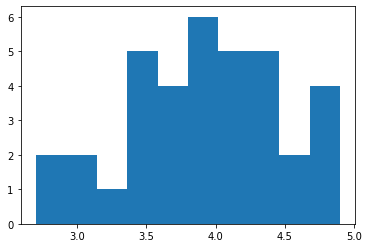

In [11]:
ans = plt.hist(female_min.score)

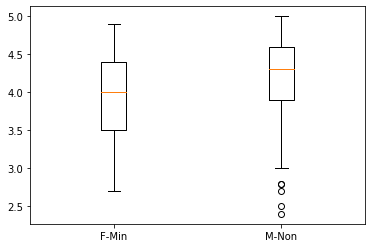

In [12]:
ans = plt.boxplot([female_min.score, male_non.score], labels=['F-Min', 'M-Non'])

### Create a side-by-side histogram

The groups are different sizes, so what is interesting here is the fraction at each value, not the count. This kind of histogram is obtained with the parameter `density=True`.

Steps
- First we need the range of values (can be obtained with `describe` on the `score` column)
- Create bins using a list comprehension
- Use `np.histogram` to extract the histogram data without rendering
- Create offset x values for bins
- Plot bars side-by-side

NEW

- `np.histogram` function
- using `density=True` on the histogram to get a density histogram rather than a count one
- `describe` to gather statistics on a Series
- manipulating the x values and bar width to get side-by-side histograms

In [13]:
evals.score.describe()

count    463.000000
mean       4.174730
std        0.543865
min        2.300000
25%        3.800000
50%        4.300000
75%        4.600000
max        5.000000
Name: score, dtype: float64

In [14]:
sc_bins = [2.0 + i*0.5 for i in range(0,8)]
sc_bins

[2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]

In [15]:
fm_dens, _ = np.histogram(female_min.score, bins=sc_bins, density=True)
mn_dens, _ = np.histogram(male_non.score, bins=sc_bins, density=True)
fm_dens

array([0.        , 0.11111111, 0.27777778, 0.55555556, 0.72222222,
       0.33333333, 0.        ])

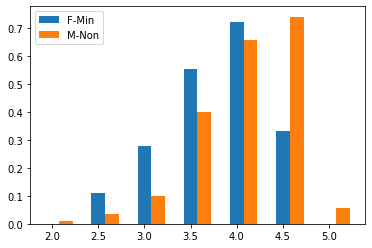

In [16]:
fig, ax = plt.subplots()

wid = 0.15

offset_bins = [val+wid for val in sc_bins[0:7]]

ax.bar(sc_bins[0:7], fm_dens, width=wid, label="F-Min")
ax.bar(offset_bins, mn_dens, width=wid, label="M-Non")

ax.legend()

## Modeling the overall score distribution

Plot the overall score distribution via histogram

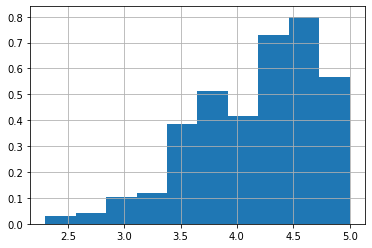

In [17]:
evals['score'].hist(density=True)

### Create a normal probability plot

NEW

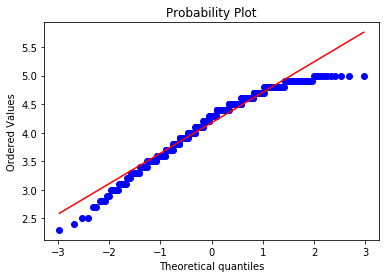

In [18]:
plot = st.probplot(evals['score'], dist='norm', plot=plt)

### Interpret the plot

NEW

Heavy-tailed to the left. Quite light-tailed to the right. Many identical values at 5.0.

### Calculate mean and std

In [19]:
scores = list(evals['score'])

score_mean = np.mean(scores)
score_std = np.std(scores)

print (f'Score stats: mean {score_mean:.2f} std-dev {score_std:.2f}')

Score stats: mean 4.17 std-dev 0.54


### Create a random variable with the characteristics of this distribution

NEW

In [20]:
prob = st.norm(score_mean, score_std)

### Plot the theoretical and actual distributions

NEW

Steps
- Create the counts and bins using `np.histogram`
- Collect 10,000 random samples from the random variable
- Plot the real data as a histogram using `density=True`
- Plot the theoretical distribution as a line

In [21]:
counts, sc_bins = np.histogram(scores, bins=sc_bins)

In [22]:
scores_theo = [prob.rvs() for _ in range(0, 10000)]
th_counts, bins = np.histogram(scores_theo, bins=sc_bins, density=True)

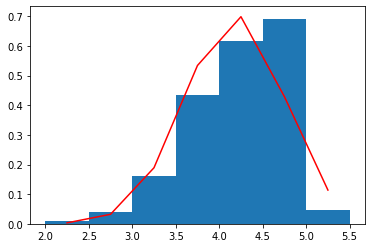

In [23]:
fig, ax = plt.subplots()
ax.hist(scores, bins=sc_bins, density=True)

pts = [(sc_bins[i]+sc_bins[i+1])/2 for i in range(0,len(sc_bins)-1)]
ax.plot(pts, th_counts, "r-")

## Some probablity calculations based on the normal distribution

NEW

### What is the percentile of the highest scoring female/minority professor compared to the whole distribution?
Use the theoretical percentile from the normal approximation, not the score data itself.

In [24]:
fm_max = female_min.score.max()
st.norm.cdf(fm_max, evals.score.mean(), evals.score.std())


0.9088241436823767

### Score to percentile
Assuming our normal distribution is a good fit. 

Professor Jones gets a 4.0 on the student evaluation, what percentile is she?

In [25]:
prob.cdf(4.0)

0.3738693800659446

### Mass in range
What percentage of professors get scores between 4 and 5.

In [26]:
prob.cdf(5.0) - prob.cdf(4.0)

0.5617568779072601

### Percentile to score

The university gives a $50 appreciation award to faculty members who average in the top 20% of the scores. What is the minimum score to get a bonus?

In [27]:
prob.ppf(0.8)

4.63196337702299